# Visualizing ECM

In [28]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
os.getcwd()

'/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel'

In [57]:

# Specify the directory to search for files
directory = os.getcwd()

# Regular expression to match the file pattern
file_pattern = r"File__5-3-19_(\d+)\.txt_FibreBox\.txt"

# Initialize variables
file_path = None
run_name = None

# Loop through the files in the directory to find the first matching file
for filename in os.listdir(directory):
    match = re.match(file_pattern, filename)
    if match:
        run_name = match.group(1)  # Extract RUN_NAME from the filename
        file_path = os.path.join(directory, filename)
        break  # Stop after finding the first match

# Check if a matching file was found
if file_path:
    print(f"First matching file: {file_path}")
    print(f"RUN_NAME: {run_name}")

    # Read the file as a CSV
    data = pd.read_csv(file_path, sep='\t', header=None)  # Update delimiter if necessary
    data.columns = ['boxD','frame','x','y','theta','density']
    print("Data loaded successfully.")
else:
    print("No matching file found in the specified directory.")


First matching file: /home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/File__5-3-19_2153630553.txt_FibreBox.txt
RUN_NAME: 2153630553
Data loaded successfully.


polarity=0.3, w5=0.2, IMT=AligningMatrixOriginal.txt


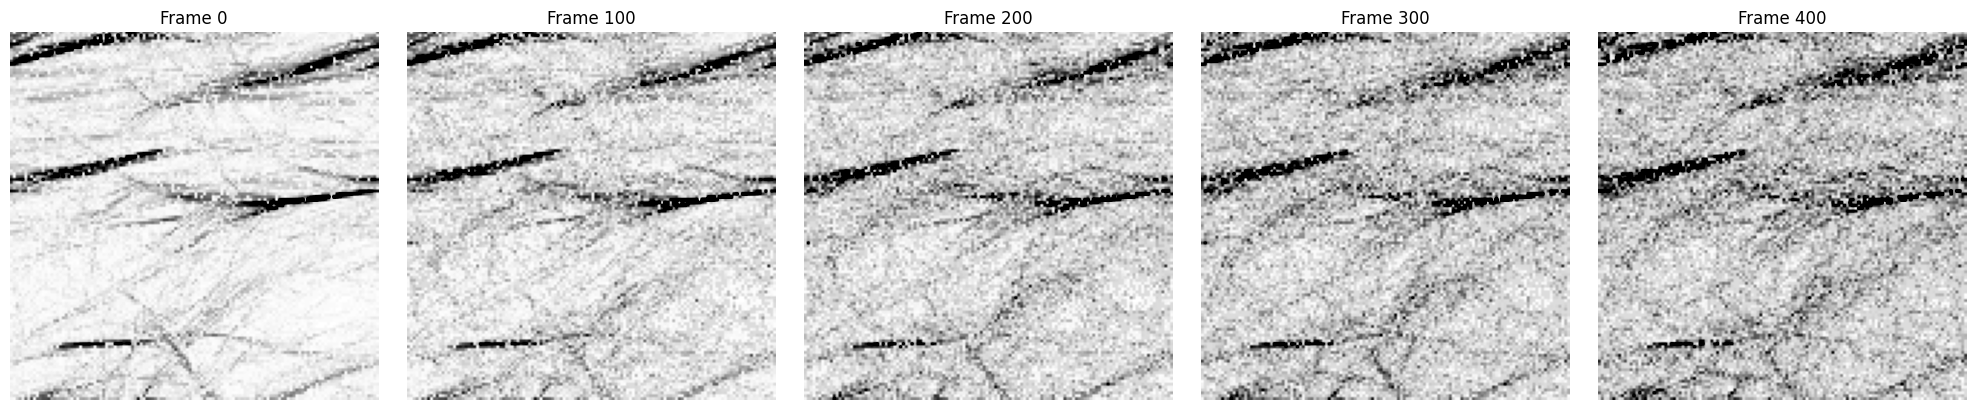

In [58]:

# Get unique frames
frames = data['frame'].unique()

# Image size
size = 128  # Assuming the grid is 128x128 as x and y are 0-127

# Create a figure with subplots
num_frames = len(frames)
cols = 5  # Number of columns in the subplot grid
rows = (num_frames + cols - 1) // cols  # Compute rows needed
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Flatten axes for easy iteration if there are multiple rows/columns
axes = axes.flatten()

for i, frame in enumerate(frames):
    # Filter data for the current frame
    frame_data = data[data['frame'] == frame]
    
    # Create an empty image
    image = np.zeros((size, size))
    
    # Populate the image
    for _, row in frame_data.iterrows():
        # Set the pixel value based on density
        image[int(row['y']), int(row['x'])] = 100 - row['density']
    
    # Normalize the image to 0-1 for displaying
    image /= 100.0
    
    # Save the individual image as PNG
    plt.imsave(f'{run_name}_{frame}.png', image, cmap='gray', origin='lower', vmax=1,vmin=0)
    
    # Plot on the subplot
    ax = axes[i]
    ax.imshow(image, cmap='gray', origin='lower', vmax=1,vmin=0)
    ax.axis('off')
    ax.set_title(f'Frame {frame}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and show the full figure
polarity = '0.3'
w5 = '0.2'
IMT = 'AligningMatrixOriginal.txt'

print(f'polarity={polarity}, w5={w5}, IMT={IMT}')
plt.tight_layout()
plt.show()
